In [1]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p

In [2]:
p.cfg['data_source'] = 'lines'
p.cfg['set_phi'] = True
p.cfg['nepochs'] = 60
p.cfg['sim_jitter_scale'] = 0.0

from ptycho import generate_data as init
# from ptycho import train

/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-04-18 02:43:24.450063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 02:43:24.545421: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-18 02:43:24.901750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared o

simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
0.99999243
nphoton 8.964052


In [3]:
from ptycho import tf_helper as hh

## Full PINN model, best params:

In [4]:
from ptycho import params as p
p.cfg['data_source'] = 'grf'
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['output_prefix'] = 'tmp'
p.cfg['positions.provided'] = False

p.cfg['gridsize'] = 2
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

offset 4
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']  

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,401,414
Trainable params: 4,397,318
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
using nominal scan positions for training


2023-04-18 02:45:35.953362: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-18 02:45:35.953377: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-04-18 02:45:35.953398: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-04-18 02:45:35.956227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-04-18 02:45:36.007327: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-18 02:45:36.007426: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60


2023-04-18 02:45:41.607838: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-04-18 02:45:42.691326: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x7ee1290


732/732 [==============================] - 13s 14ms/step - loss: 220685024.0000 - trimmed_obj_loss: 0.1577 - intensity_scaler_inv_loss: 24.9382 - distribution_lambda_loss: 220685024.0000 - probe_illumination_loss: 0.0306 - val_loss: 118486456.0000 - val_trimmed_obj_loss: 0.1541 - val_intensity_scaler_inv_loss: 22.5946 - val_distribution_lambda_loss: 118486456.0000 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 9s 13ms/step - loss: 83718608.0000 - trimmed_obj_loss: 0.1309 - intensity_scaler_inv_loss: 20.8758 - distribution_lambda_loss: 83718608.0000 - probe_illumination_loss: 0.0306 - val_loss: 90913976.0000 - val_trimmed_obj_loss: 0.1394 - val_intensity_scaler_inv_loss: 21.5927 - val_distribution_lambda_loss: 90913976.0000 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 9s 13ms/step - loss: 57441376.0000 - trimmed_obj_loss: 0.1315 - intensity_scaler_inv_loss: 18.6305 - dis

732/732 [==============================] - 9s 13ms/step - loss: 15266561.0000 - trimmed_obj_loss: 0.1788 - intensity_scaler_inv_loss: 10.8130 - distribution_lambda_loss: 15266561.0000 - probe_illumination_loss: 0.0306 - val_loss: 16747563.0000 - val_trimmed_obj_loss: 0.1803 - val_intensity_scaler_inv_loss: 11.2933 - val_distribution_lambda_loss: 16747563.0000 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 21/60
732/732 [==============================] - 9s 13ms/step - loss: 13834496.0000 - trimmed_obj_loss: 0.1829 - intensity_scaler_inv_loss: 10.5489 - distribution_lambda_loss: 13834496.0000 - probe_illumination_loss: 0.0306 - val_loss: 14818296.0000 - val_trimmed_obj_loss: 0.1837 - val_intensity_scaler_inv_loss: 10.8857 - val_distribution_lambda_loss: 14818296.0000 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 22/60
732/732 [==============================] - 9s 13ms/step - loss: 13539951.0000 - trimmed_obj_loss: 0.1889 - intensity_scaler_inv_loss: 10.4292 - distri

Epoch 38/60
732/732 [==============================] - 9s 13ms/step - loss: 7250351.0000 - trimmed_obj_loss: 0.1945 - intensity_scaler_inv_loss: 8.3159 - distribution_lambda_loss: 7250351.0000 - probe_illumination_loss: 0.0306 - val_loss: 9438067.0000 - val_trimmed_obj_loss: 0.1913 - val_intensity_scaler_inv_loss: 9.0586 - val_distribution_lambda_loss: 9438067.0000 - val_probe_illumination_loss: 0.0314 - lr: 2.5000e-04
Epoch 39/60
732/732 [==============================] - 9s 13ms/step - loss: 7115957.5000 - trimmed_obj_loss: 0.1942 - intensity_scaler_inv_loss: 8.2640 - distribution_lambda_loss: 7115957.5000 - probe_illumination_loss: 0.0306 - val_loss: 9442827.0000 - val_trimmed_obj_loss: 0.1926 - val_intensity_scaler_inv_loss: 9.0858 - val_distribution_lambda_loss: 9442827.0000 - val_probe_illumination_loss: 0.0314 - lr: 2.5000e-04
Epoch 40/60
732/732 [==============================] - 9s 13ms/step - loss: 7088464.5000 - trimmed_obj_loss: 0.1940 - intensity_scaler_inv_loss: 8.2415 - 

732/732 [==============================] - 9s 13ms/step - loss: 5806568.5000 - trimmed_obj_loss: 0.1894 - intensity_scaler_inv_loss: 7.6234 - distribution_lambda_loss: 5806568.5000 - probe_illumination_loss: 0.0306 - val_loss: 8764486.0000 - val_trimmed_obj_loss: 0.1862 - val_intensity_scaler_inv_loss: 8.7768 - val_distribution_lambda_loss: 8764486.0000 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 57/60
732/732 [==============================] - 9s 13ms/step - loss: 5770427.0000 - trimmed_obj_loss: 0.1893 - intensity_scaler_inv_loss: 7.6060 - distribution_lambda_loss: 5770427.0000 - probe_illumination_loss: 0.0306 - val_loss: 8606362.0000 - val_trimmed_obj_loss: 0.1867 - val_intensity_scaler_inv_loss: 8.7095 - val_distribution_lambda_loss: 8606362.0000 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 58/60
732/732 [==============================] - 9s 13ms/step - loss: 5739995.0000 - trimmed_obj_loss: 0.1890 - intensity_scaler_inv_loss: 7.5893 - distribution

In [7]:
# with phase
mae(trim(YY_ground_truth), trim(reassemble(b)[0])) # PINN

mean scale adjustment: 0.34507117


0.008832247

In [4]:
# without phase
mae(trim(YY_ground_truth), trim(reassemble(b)[0])) # PINN

mean scale adjustment: 0.34942797


0.011262403

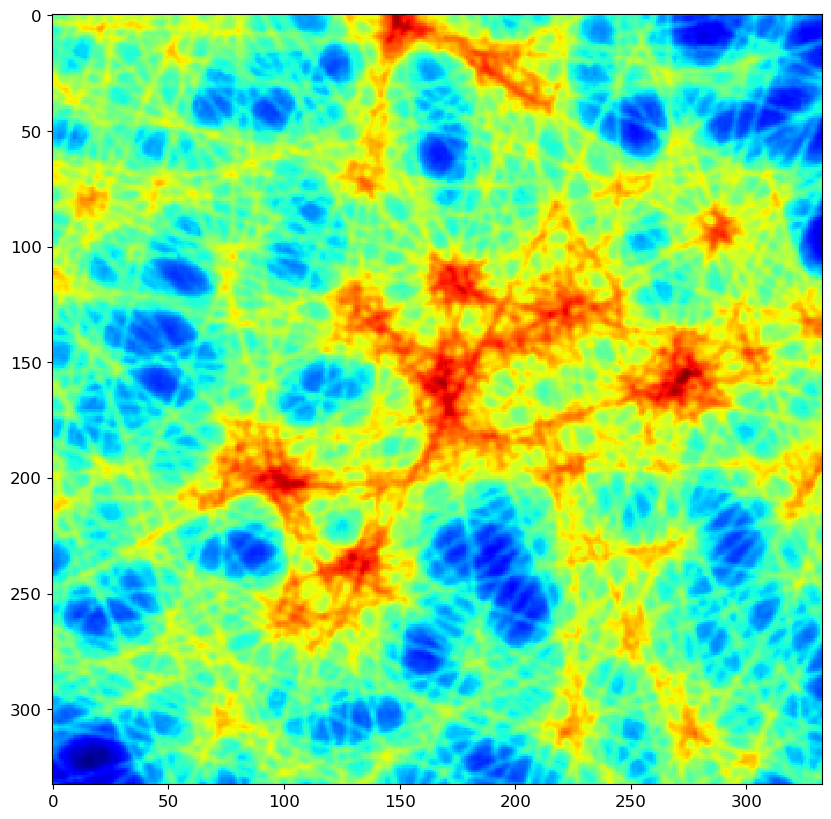

In [5]:
plt.rcParams["figure.figsize"] = (10, 10)
 
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet', interpolation='none')

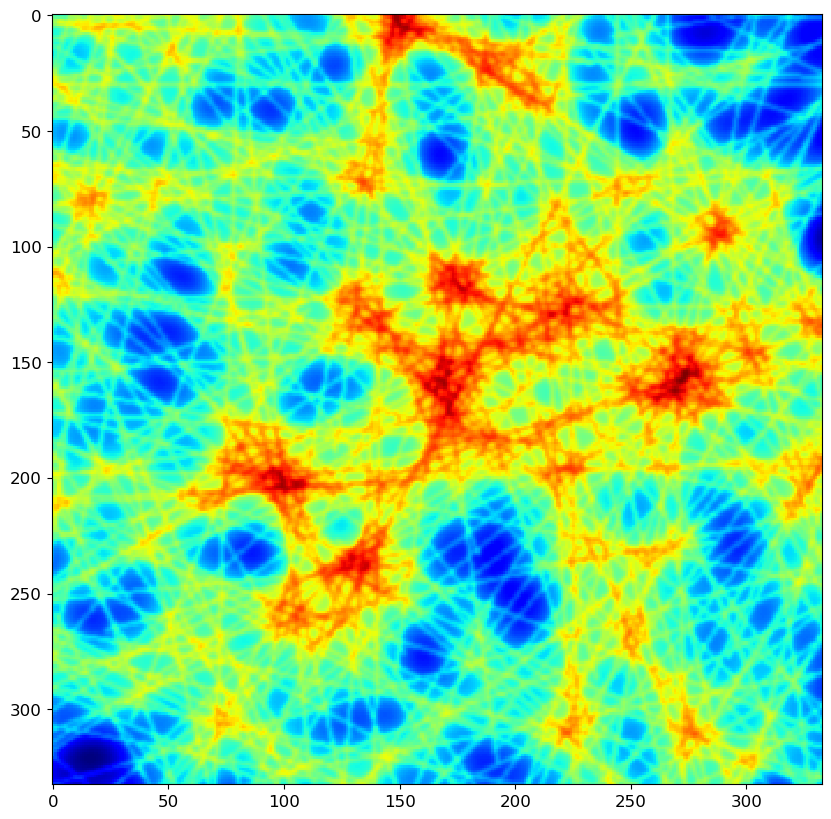

In [6]:
# vmin = np.min(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
# vmax = np.max(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
plt.imshow(YY_ground_truth, interpolation = 'none',
          cmap = 'jet')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


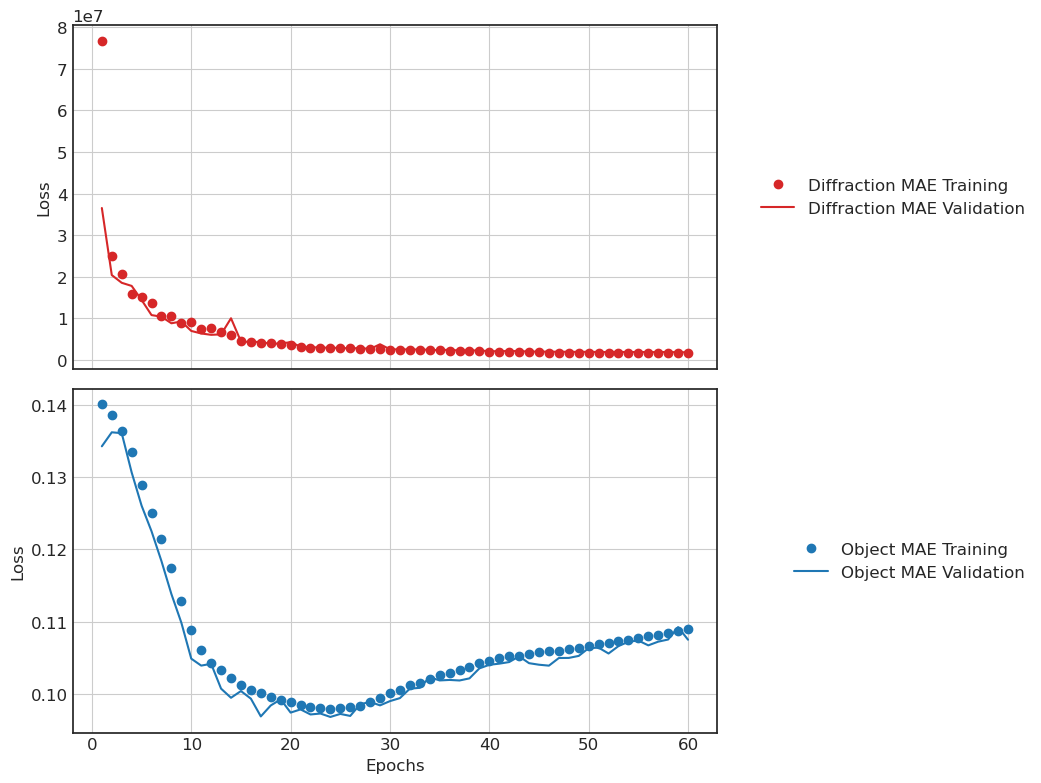

In [7]:
from ptycho import evaluation
reload(evaluation)

evaluation.plt_metrics(history, metric2 = 'trimmed_obj_loss')

phase min: -0.22820145 phase max: 0.099690646


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


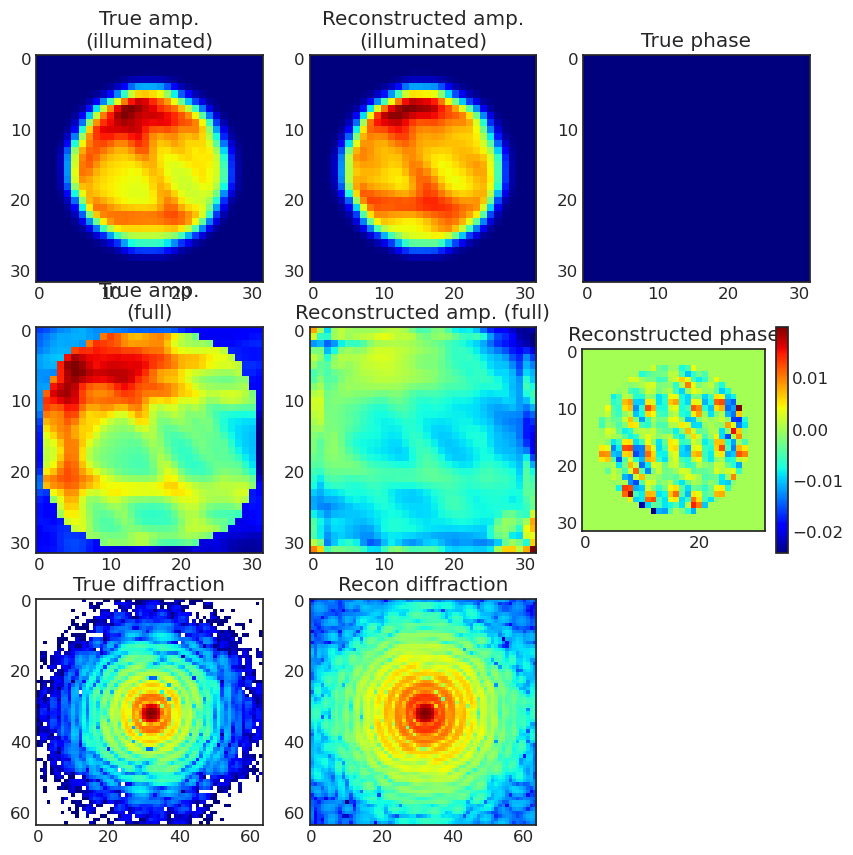

In [8]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 0)

In [11]:
reload(evaluation)

<module 'ptycho.evaluation' from '/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py'>

phase min: 0.0 phase max: 2.7455263


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:58: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


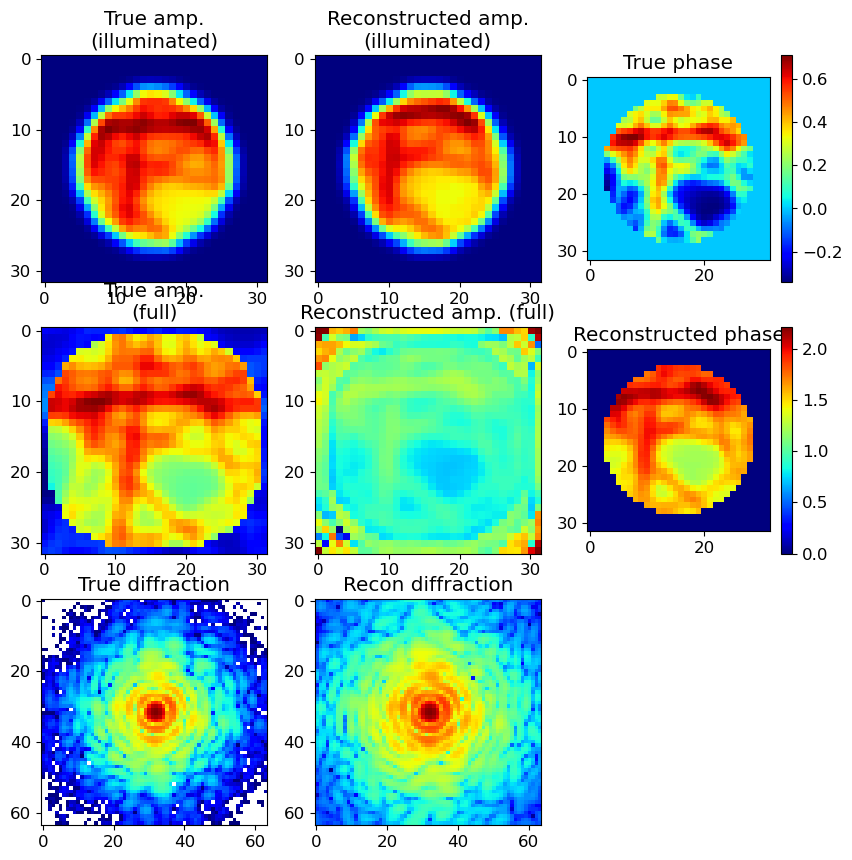

In [6]:
from ptycho import evaluation
evaluation.summarize(40, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 0)

## With MAE instead of NLL

In [9]:
from importlib import reload
import matplotlib.pyplot as plt
from ptycho import params as p

p.cfg['offset'] = 4

# Swap NLL and MAE weights
p.cfg['nll_weight'] = 0.
p.cfg['mae_weight'] = 1.
p.cfg['intensity_scale.trainable'] = True
p.cfg['object.big'] = True
p.cfg['n_filters_scale'] = 2


from ptycho import train, model
reload(model)
reload(train)

p.cfg
from ptycho.train import *

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']           

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,401,414
Trainable params: 4,397,318
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
offset 4


2023-04-17 16:08:23.106186: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-17 16:08:23.106202: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-04-17 16:08:23.422308: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-17 16:08:23.422410: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
732/732 [==============================] - 11s 13ms/step - loss: 12.3615 - trimmed_obj_loss: 0.1465 - intensity_scaler_inv_loss: 12.3615 - distribution_lambda_loss: 93573232.0000 - probe_illumination_loss: 0.0306 - val_loss: 10.7567 - val_trimmed_obj_loss: 0.1491 - val_intensity_scaler_inv_loss: 10.7567 - val_distribution_lambda_loss: 42147720.0000 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 9s 12ms/step - loss: 9.9522 - trimmed_obj_loss: 0.1423 - intensity_scaler_inv_loss: 9.9522 - distribution_lambda_loss: 29437558.0000 - probe_illumination_loss: 0.0306 - val_loss: 9.8849 - val_trimmed_obj_loss: 0.1398 - val_intensity_scaler_inv_loss: 9.8849 - val_distribution_lambda_loss: 29034320.0000 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 9s 12ms/step - loss: 9.0889 - trimmed_obj_loss: 0.1346 - intensity_scaler_inv_loss: 9.0889 - distribution_lambda_loss: 206971

Epoch 20/60
732/732 [==============================] - 9s 12ms/step - loss: 4.8193 - trimmed_obj_loss: 0.1002 - intensity_scaler_inv_loss: 4.8193 - distribution_lambda_loss: 3272436.0000 - probe_illumination_loss: 0.0306 - val_loss: 4.9416 - val_trimmed_obj_loss: 0.0996 - val_intensity_scaler_inv_loss: 4.9416 - val_distribution_lambda_loss: 3512821.2500 - val_probe_illumination_loss: 0.0314 - lr: 2.5000e-04
Epoch 21/60
731/732 [============================>.] - ETA: 0s - loss: 4.7571 - trimmed_obj_loss: 0.1002 - intensity_scaler_inv_loss: 4.7571 - distribution_lambda_loss: 3167875.2500 - probe_illumination_loss: 0.0306
Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
732/732 [==============================] - 9s 12ms/step - loss: 4.7571 - trimmed_obj_loss: 0.1002 - intensity_scaler_inv_loss: 4.7571 - distribution_lambda_loss: 3167739.0000 - probe_illumination_loss: 0.0306 - val_loss: 4.9670 - val_trimmed_obj_loss: 0.0987 - val_intensity_scaler_inv_loss: 4.96

Epoch 39/60
732/732 [==============================] - 9s 12ms/step - loss: 4.1521 - trimmed_obj_loss: 0.1104 - intensity_scaler_inv_loss: 4.1521 - distribution_lambda_loss: 2265366.5000 - probe_illumination_loss: 0.0306 - val_loss: 4.2640 - val_trimmed_obj_loss: 0.1099 - val_intensity_scaler_inv_loss: 4.2640 - val_distribution_lambda_loss: 2420940.2500 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 40/60
732/732 [==============================] - 9s 12ms/step - loss: 4.1345 - trimmed_obj_loss: 0.1106 - intensity_scaler_inv_loss: 4.1345 - distribution_lambda_loss: 2241482.0000 - probe_illumination_loss: 0.0306 - val_loss: 4.2626 - val_trimmed_obj_loss: 0.1099 - val_intensity_scaler_inv_loss: 4.2626 - val_distribution_lambda_loss: 2414946.5000 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 41/60
732/732 [==============================] - 9s 12ms/step - loss: 4.1214 - trimmed_obj_loss: 0.1106 - intensity_scaler_inv_loss: 4.1214 - distribution_lambda_loss: 2225

Epoch 59/60
732/732 [==============================] - 9s 13ms/step - loss: 3.8652 - trimmed_obj_loss: 0.1126 - intensity_scaler_inv_loss: 3.8652 - distribution_lambda_loss: 1900002.2500 - probe_illumination_loss: 0.0306 - val_loss: 4.0265 - val_trimmed_obj_loss: 0.1116 - val_intensity_scaler_inv_loss: 4.0265 - val_distribution_lambda_loss: 2084316.5000 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 60/60
129/129 [==============================] - 7s 53ms/step


In [10]:
pinn_ol_mae_score = mae(trim(YY_ground_truth), trim(reassemble(b)[0])) 
pinn_ol_mae_score

mean scale adjustment: 0.37388012


0.012302038

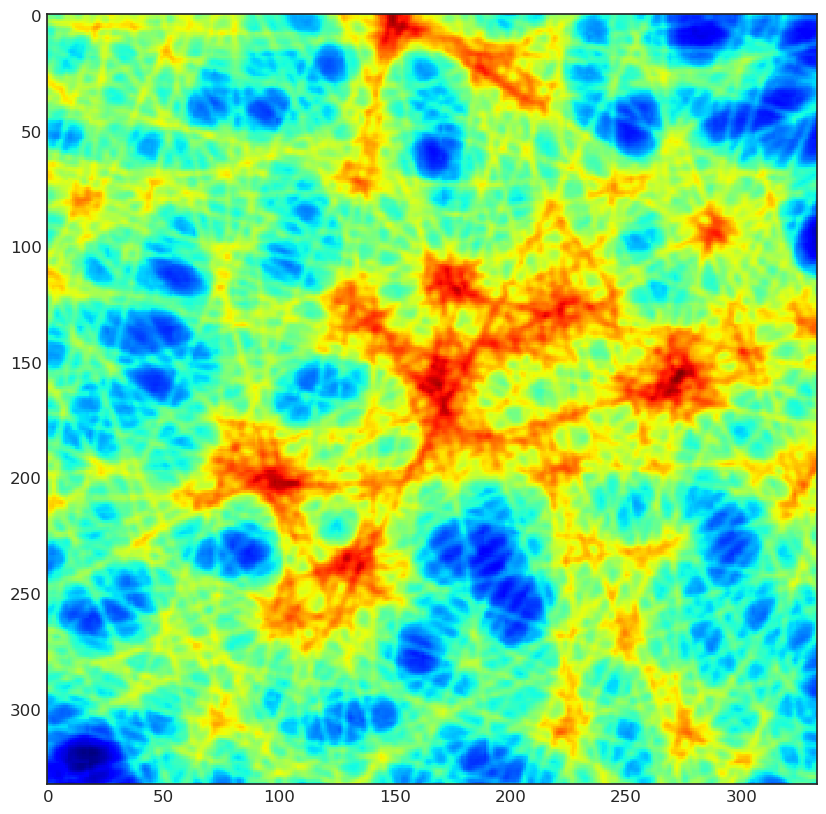

In [11]:
plt.rcParams["figure.figsize"] = (10, 10)

stitched = stitch(b, norm_Y_I_test,
                  #nsegments=37,
                  norm = False)

plt.imshow(stitched[0], interpolation = 'none', cmap = 'jet')
#plt.imshow(stitched[0], interpolation = 'none', vmin = vmin, vmax = vmax, cmap = 'jet')

phase min: -0.001305151 phase max: 0.0


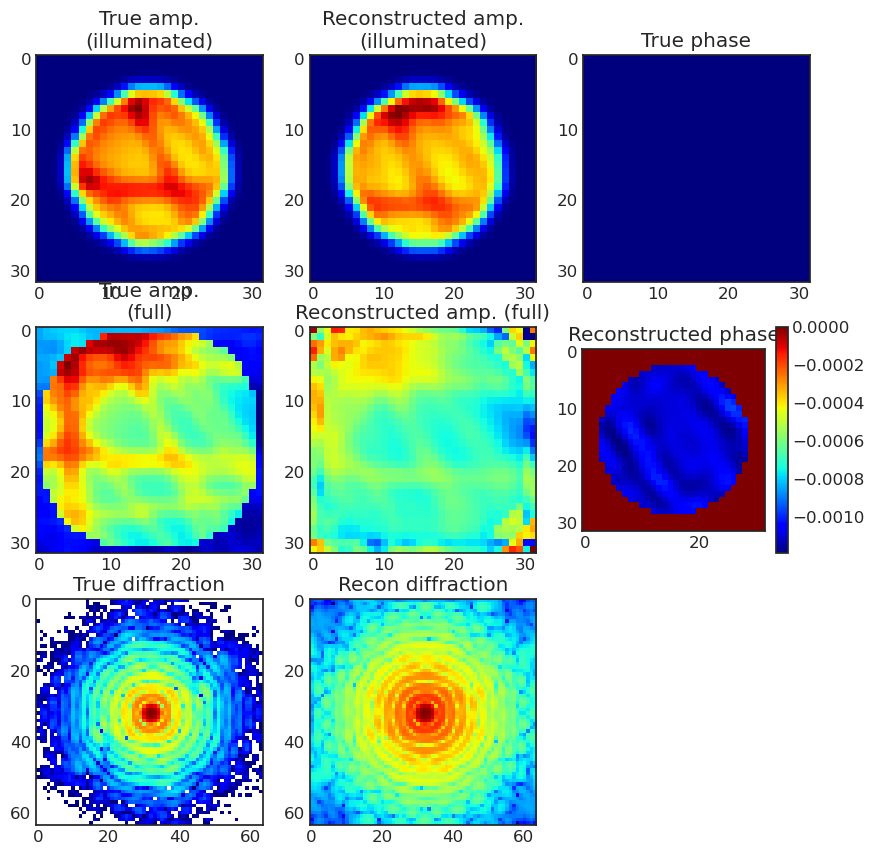

In [12]:
# Offset 4, jitter = 0 val_loss: 2625558.
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 2)

## PtychoNN with overlaps

In [13]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p

p.cfg['data_source'] = 'lines'
p.cfg['n_filters_scale'] = 1
p.cfg['gridsize'] = 2

from ptycho import baselines as bl
reload(bl)

from ptycho.generate_data import *

baseline_model_overlap = bl.train((X_train[:, :, :, :4]),
                          Y_I_train[:, :, :, :4], Y_phi_train[:, :, :, :4])

baseline_overlap_pred_I, baseline_overlap_pred_phi = baseline_model_overlap.predict(
    [X_test[:, :, :, :4]  * bl.params.params()['intensity_scale']])
baseline_overlap_stitched = stitch(baseline_overlap_pred_I[:, :, :, :1], norm_Y_I_test)


# For comparison to the 'baseline' model (PtychoNN) we need to crop/shift in a different way
def xyshift(arr2d, dx, dy):
    from scipy.ndimage.interpolation import shift
    arr2d = np.roll(arr2d, dx, axis = 0)
    arr2d = np.roll(arr2d, dy, axis = 1)
    return arr2d

YY_baseline_overlap = xyshift(baseline_overlap_stitched[0], -2, -2)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   1184        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 32)   0           ['conv2d_1[0][0]']               
                                                                                              

366/366 [==============================] - 4s 12ms/step - loss: 0.0039 - conv2d_12_loss: 0.0037 - conv2d_19_loss: 1.1132e-04 - val_loss: 0.0036 - val_conv2d_12_loss: 0.0035 - val_conv2d_19_loss: 8.1870e-05 - lr: 0.0010
Epoch 9/60
366/366 [==============================] - ETA: 0s - loss: 0.0041 - conv2d_12_loss: 0.0039 - conv2d_19_loss: 1.1504e-04
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
366/366 [==============================] - 4s 12ms/step - loss: 0.0041 - conv2d_12_loss: 0.0039 - conv2d_19_loss: 1.1504e-04 - val_loss: 0.0046 - val_conv2d_12_loss: 0.0045 - val_conv2d_19_loss: 1.2451e-04 - lr: 0.0010
Epoch 10/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0032 - conv2d_12_loss: 0.0031 - conv2d_19_loss: 5.8399e-05 - val_loss: 0.0031 - val_conv2d_12_loss: 0.0030 - val_conv2d_19_loss: 7.1535e-05 - lr: 5.0000e-04
Epoch 11/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0031 - conv2d_12_loss: 0.0030 - conv2d_19_

Epoch 40/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0022 - conv2d_12_loss: 0.0022 - conv2d_19_loss: 1.0814e-05 - val_loss: 0.0022 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 7.8683e-06 - lr: 1.0000e-04
Epoch 41/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0022 - conv2d_12_loss: 0.0022 - conv2d_19_loss: 1.0777e-05 - val_loss: 0.0022 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 8.6205e-06 - lr: 1.0000e-04
Epoch 42/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0022 - conv2d_12_loss: 0.0022 - conv2d_19_loss: 1.0801e-05 - val_loss: 0.0022 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 3.4675e-06 - lr: 1.0000e-04
Epoch 43/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0022 - conv2d_12_loss: 0.0022 - conv2d_19_loss: 1.0820e-05 - val_loss: 0.0022 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 4.2342e-06 - lr: 1.0000e-04
Epoch 44/60
366/366 [==============================] - 4s 12

In [14]:
mae(trim(YY_ground_truth), trim(YY_baseline_overlap))

mean scale adjustment: 0.23280002


0.01760842

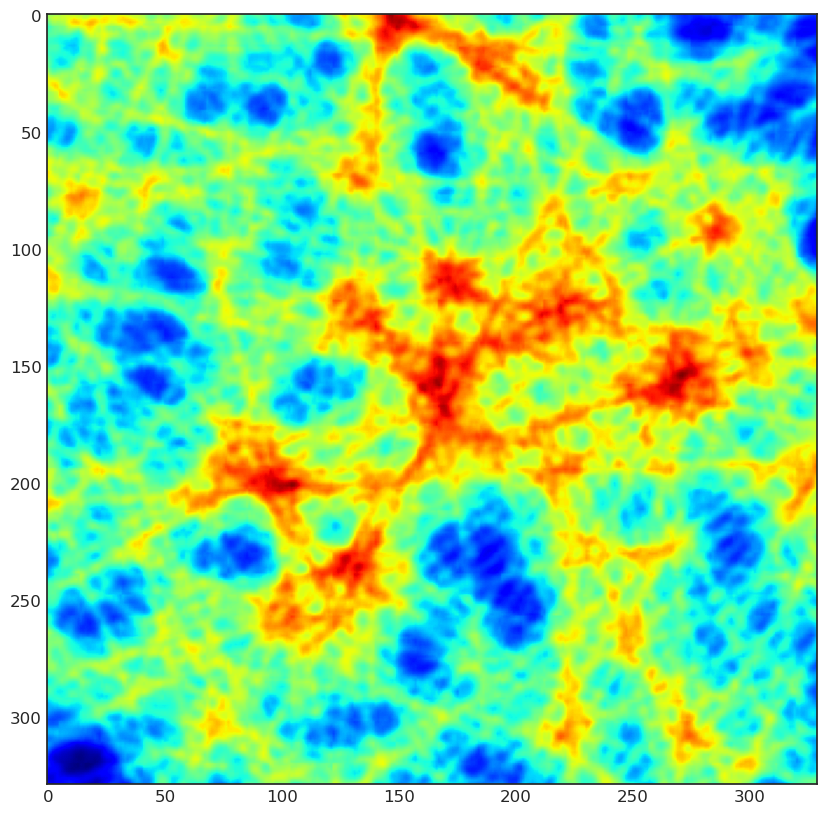

In [15]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.imshow(trim(YY_baseline_overlap), cmap = 'jet')

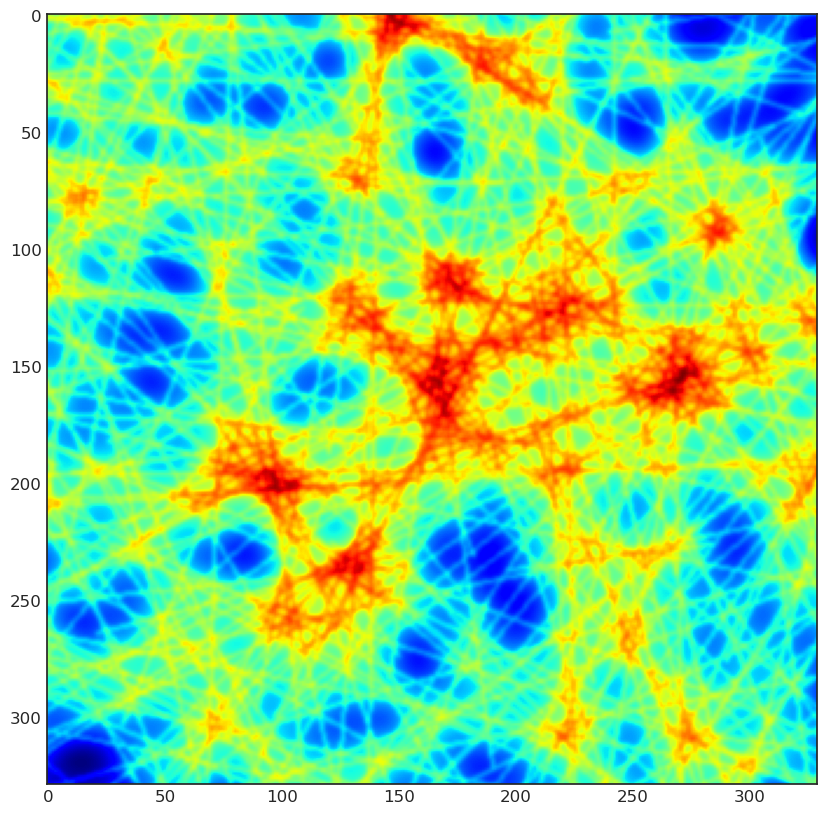

In [16]:
plt.imshow(trim(YY_ground_truth), cmap = 'jet')

## PINN + NLL

In [17]:
p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 1.
p.cfg['mae_weight'] = 0.

from ptycho import generate_data as init
reload(init)

# print(p.cfg)
from ptycho.generate_data import *

reload(train.model)
reload(train)
from ptycho.train import *

simulating gaussian position jitter, scale 0.0
Sampling on regular grid
simulating gaussian position jitter, scale 0.0
Sampling on regular grid
0.99999523
nphoton 8.969574
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 1)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   320         ['intensity_scaler[0][0]']       
                   

                                                                                                  
 trimmed_obj (Lambda)           (None, 64, 64, 1)    0           ['padded_obj_2[0][0]']           
                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 1),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 1))                                               
                                                                                                  
Total params: 1,103,459
Trainable params: 1,099,363
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
offset 4


2023-04-17 16:26:12.304046: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-17 16:26:12.304068: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-04-17 16:26:12.624928: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-17 16:26:12.625017: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
732/732 [==============================] - 7s 8ms/step - loss: 12787774.0000 - trimmed_obj_loss: 0.0983 - intensity_scaler_inv_loss: 10.8861 - distribution_lambda_loss: 12787774.0000 - probe_illumination_loss: 0.0282 - val_loss: 5198099.0000 - val_trimmed_obj_loss: 0.0994 - val_intensity_scaler_inv_loss: 9.4770 - val_distribution_lambda_loss: 5198099.0000 - val_probe_illumination_loss: 0.0290 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 5s 7ms/step - loss: 4299074.5000 - trimmed_obj_loss: 0.0973 - intensity_scaler_inv_loss: 8.7200 - distribution_lambda_loss: 4299074.5000 - probe_illumination_loss: 0.0282 - val_loss: 4288331.0000 - val_trimmed_obj_loss: 0.0936 - val_intensity_scaler_inv_loss: 8.6924 - val_distribution_lambda_loss: 4288331.0000 - val_probe_illumination_loss: 0.0290 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 5s 7ms/step - loss: 3446357.5000 - trimmed_obj_loss: 0.0942 - intensity_scaler_inv_loss: 8.3115 - distributio

Epoch 20/60
732/732 [==============================] - 5s 7ms/step - loss: 589536.3125 - trimmed_obj_loss: 0.1154 - intensity_scaler_inv_loss: 4.3759 - distribution_lambda_loss: 589536.3125 - probe_illumination_loss: 0.0282 - val_loss: 584968.2500 - val_trimmed_obj_loss: 0.1157 - val_intensity_scaler_inv_loss: 4.3117 - val_distribution_lambda_loss: 584968.2500 - val_probe_illumination_loss: 0.0290 - lr: 5.0000e-04
Epoch 21/60
732/732 [==============================] - 5s 7ms/step - loss: 622833.5000 - trimmed_obj_loss: 0.1180 - intensity_scaler_inv_loss: 4.3919 - distribution_lambda_loss: 622833.5000 - probe_illumination_loss: 0.0282 - val_loss: 784212.8750 - val_trimmed_obj_loss: 0.1167 - val_intensity_scaler_inv_loss: 4.5911 - val_distribution_lambda_loss: 784212.8750 - val_probe_illumination_loss: 0.0290 - lr: 5.0000e-04
Epoch 22/60
732/732 [==============================] - 5s 7ms/step - loss: 584406.8750 - trimmed_obj_loss: 0.1200 - intensity_scaler_inv_loss: 4.3147 - distribution

732/732 [==============================] - 5s 7ms/step - loss: 359812.0312 - trimmed_obj_loss: 0.1378 - intensity_scaler_inv_loss: 3.5667 - distribution_lambda_loss: 359812.0312 - probe_illumination_loss: 0.0282 - val_loss: 377672.4688 - val_trimmed_obj_loss: 0.1375 - val_intensity_scaler_inv_loss: 3.6146 - val_distribution_lambda_loss: 377672.4688 - val_probe_illumination_loss: 0.0290 - lr: 1.2500e-04
Epoch 39/60
732/732 [==============================] - 5s 7ms/step - loss: 357209.2500 - trimmed_obj_loss: 0.1385 - intensity_scaler_inv_loss: 3.5552 - distribution_lambda_loss: 357209.2500 - probe_illumination_loss: 0.0282 - val_loss: 375559.3125 - val_trimmed_obj_loss: 0.1376 - val_intensity_scaler_inv_loss: 3.6269 - val_distribution_lambda_loss: 375559.3125 - val_probe_illumination_loss: 0.0290 - lr: 1.2500e-04
Epoch 40/60
732/732 [==============================] - 5s 7ms/step - loss: 352306.0312 - trimmed_obj_loss: 0.1393 - intensity_scaler_inv_loss: 3.5341 - distribution_lambda_loss

Epoch 57/60
732/732 [==============================] - 5s 7ms/step - loss: 298884.7188 - trimmed_obj_loss: 0.1498 - intensity_scaler_inv_loss: 3.2796 - distribution_lambda_loss: 298884.7188 - probe_illumination_loss: 0.0282 - val_loss: 322536.1562 - val_trimmed_obj_loss: 0.1483 - val_intensity_scaler_inv_loss: 3.3949 - val_distribution_lambda_loss: 322536.1562 - val_probe_illumination_loss: 0.0290 - lr: 1.0000e-04
Epoch 58/60
732/732 [==============================] - 5s 7ms/step - loss: 298191.2500 - trimmed_obj_loss: 0.1502 - intensity_scaler_inv_loss: 3.2755 - distribution_lambda_loss: 298191.2500 - probe_illumination_loss: 0.0282 - val_loss: 323712.6562 - val_trimmed_obj_loss: 0.1501 - val_intensity_scaler_inv_loss: 3.3822 - val_distribution_lambda_loss: 323712.6562 - val_probe_illumination_loss: 0.0290 - lr: 1.0000e-04
Epoch 59/60
732/732 [==============================] - 5s 7ms/step - loss: 296484.6250 - trimmed_obj_loss: 0.1506 - intensity_scaler_inv_loss: 3.2673 - distribution

phase min: -2.0462537 phase max: 3.0215163


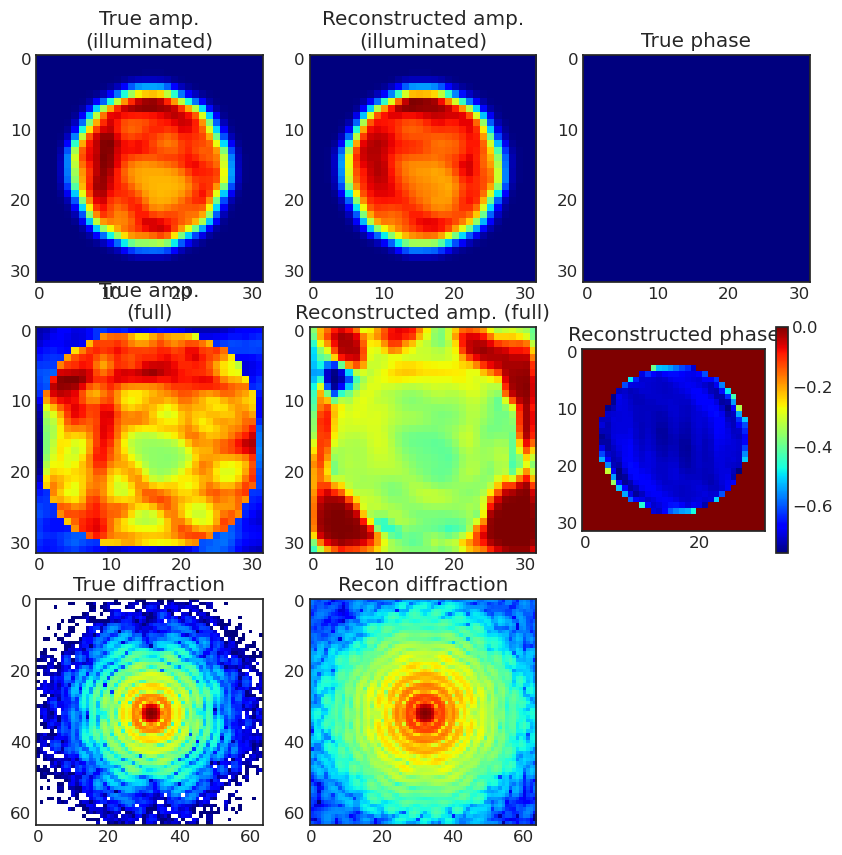

In [18]:
from ptycho import evaluation
evaluation.summarize(40, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 0)

In [20]:
mae(trim(YY_ground_truth), trim(reassemble(b)[0])) # PINN, no overlap, 60 epochs, NLL

mean scale adjustment: 0.2773652978898086


0.04122308971125927

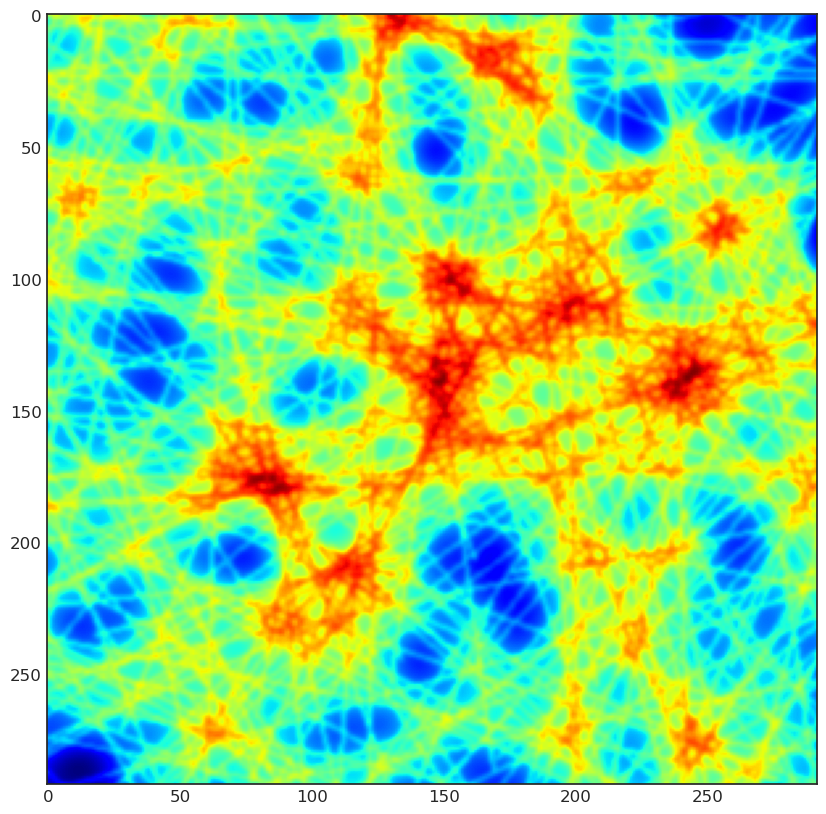

In [21]:
plt.imshow(trim(YY_ground_truth), cmap = 'jet')

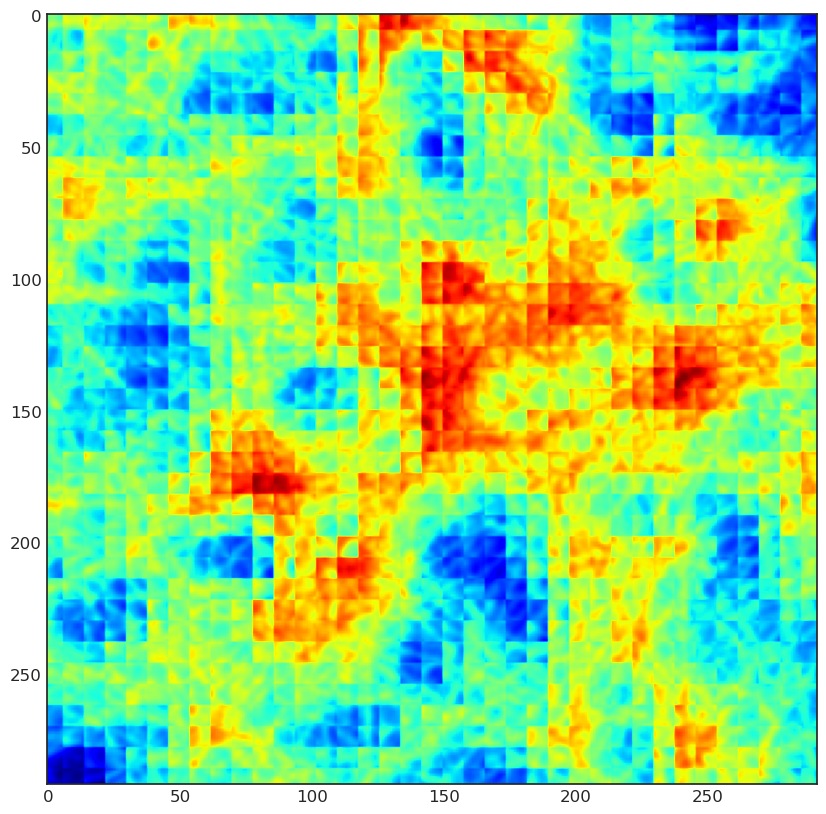

In [22]:
plt.imshow(trim(reassemble(b)[0]), cmap = 'jet')

## PINN, MAE, no overlap:

In [24]:
p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 0.
p.cfg['mae_weight'] = 1.

reload(train.model)
reload(train)

print(p.cfg)
from ptycho.generate_data import *
from ptycho.train import *

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 1)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   320         ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 32)   9248        ['conv2d[0][0]']           

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 1),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 1))                                               
                                                                                                  
Total params: 1,103,459
Trainable params: 1,099,363
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
offset 4


2023-04-17 16:44:04.103313: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-17 16:44:04.103328: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-04-17 16:44:04.410436: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-17 16:44:04.410527: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
732/732 [==============================] - 7s 8ms/step - loss: 11.0382 - trimmed_obj_loss: 0.0980 - intensity_scaler_inv_loss: 11.0382 - distribution_lambda_loss: 15555002.0000 - probe_illumination_loss: 0.0282 - val_loss: 9.5402 - val_trimmed_obj_loss: 0.0957 - val_intensity_scaler_inv_loss: 9.5402 - val_distribution_lambda_loss: 6595474.5000 - val_probe_illumination_loss: 0.0290 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 5s 7ms/step - loss: 8.8968 - trimmed_obj_loss: 0.0926 - intensity_scaler_inv_loss: 8.8968 - distribution_lambda_loss: 5564030.5000 - probe_illumination_loss: 0.0282 - val_loss: 8.3097 - val_trimmed_obj_loss: 0.0905 - val_intensity_scaler_inv_loss: 8.3097 - val_distribution_lambda_loss: 4103573.7500 - val_probe_illumination_loss: 0.0290 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 5s 7ms/step - loss: 8.3155 - trimmed_obj_loss: 0.0896 - intensity_scaler_inv_loss: 8.3155 - distribution_lambda_loss: 4271727.5000 - 

732/732 [==============================] - 5s 7ms/step - loss: 3.9177 - trimmed_obj_loss: 0.1137 - intensity_scaler_inv_loss: 3.9177 - distribution_lambda_loss: 704037.4375 - probe_illumination_loss: 0.0282 - val_loss: 3.9472 - val_trimmed_obj_loss: 0.1139 - val_intensity_scaler_inv_loss: 3.9472 - val_distribution_lambda_loss: 704362.3750 - val_probe_illumination_loss: 0.0290 - lr: 5.0000e-04
Epoch 21/60
732/732 [==============================] - 5s 7ms/step - loss: 3.8295 - trimmed_obj_loss: 0.1155 - intensity_scaler_inv_loss: 3.8295 - distribution_lambda_loss: 665138.3125 - probe_illumination_loss: 0.0282 - val_loss: 3.8394 - val_trimmed_obj_loss: 0.1146 - val_intensity_scaler_inv_loss: 3.8394 - val_distribution_lambda_loss: 641421.5625 - val_probe_illumination_loss: 0.0290 - lr: 5.0000e-04
Epoch 22/60
732/732 [==============================] - 5s 7ms/step - loss: 3.8315 - trimmed_obj_loss: 0.1174 - intensity_scaler_inv_loss: 3.8315 - distribution_lambda_loss: 676195.8125 - probe_ill

Epoch 39/60
732/732 [==============================] - 5s 7ms/step - loss: 3.1168 - trimmed_obj_loss: 0.1389 - intensity_scaler_inv_loss: 3.1168 - distribution_lambda_loss: 431867.9688 - probe_illumination_loss: 0.0282 - val_loss: 3.2273 - val_trimmed_obj_loss: 0.1378 - val_intensity_scaler_inv_loss: 3.2273 - val_distribution_lambda_loss: 461801.3438 - val_probe_illumination_loss: 0.0290 - lr: 1.2500e-04
Epoch 40/60
732/732 [==============================] - 5s 7ms/step - loss: 3.1121 - trimmed_obj_loss: 0.1392 - intensity_scaler_inv_loss: 3.1121 - distribution_lambda_loss: 430507.9062 - probe_illumination_loss: 0.0282 - val_loss: 3.2175 - val_trimmed_obj_loss: 0.1384 - val_intensity_scaler_inv_loss: 3.2175 - val_distribution_lambda_loss: 463129.7812 - val_probe_illumination_loss: 0.0290 - lr: 1.2500e-04
Epoch 41/60
732/732 [==============================] - 5s 7ms/step - loss: 3.1037 - trimmed_obj_loss: 0.1396 - intensity_scaler_inv_loss: 3.1037 - distribution_lambda_loss: 428285.3750

732/732 [==============================] - 5s 7ms/step - loss: 2.9527 - trimmed_obj_loss: 0.1441 - intensity_scaler_inv_loss: 2.9527 - distribution_lambda_loss: 380970.7500 - probe_illumination_loss: 0.0282 - val_loss: 3.0829 - val_trimmed_obj_loss: 0.1429 - val_intensity_scaler_inv_loss: 3.0829 - val_distribution_lambda_loss: 418363.2500 - val_probe_illumination_loss: 0.0290 - lr: 1.0000e-04
Epoch 59/60
732/732 [==============================] - 5s 7ms/step - loss: 2.9479 - trimmed_obj_loss: 0.1442 - intensity_scaler_inv_loss: 2.9479 - distribution_lambda_loss: 380428.1250 - probe_illumination_loss: 0.0282 - val_loss: 3.0814 - val_trimmed_obj_loss: 0.1430 - val_intensity_scaler_inv_loss: 3.0814 - val_distribution_lambda_loss: 418290.2500 - val_probe_illumination_loss: 0.0290 - lr: 1.0000e-04
Epoch 60/60
129/129 [==============================] - 3s 20ms/step
{'N': 64, 'offset': 4, 'gridsize': 1, 'bigoffset': 16, 'batch_size': 16, 'nepochs': 60, 'h': 64, 'w': 64, 'n_filters_scale': 1, 

phase min: -0.35025114 phase max: 1.339348


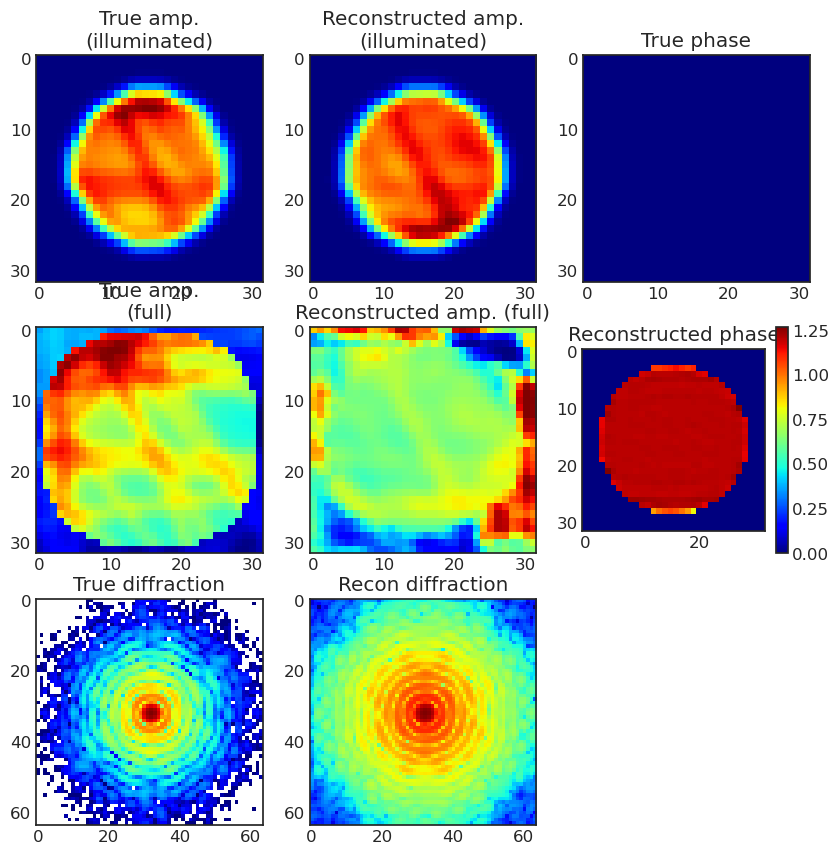

In [25]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 0)

In [26]:
mae(trim(YY_ground_truth), trim(reassemble(b)[0])) # PINN, no overlap, 30 epochs, MAE

mean scale adjustment: 0.2822093023953234


0.04197105766831666

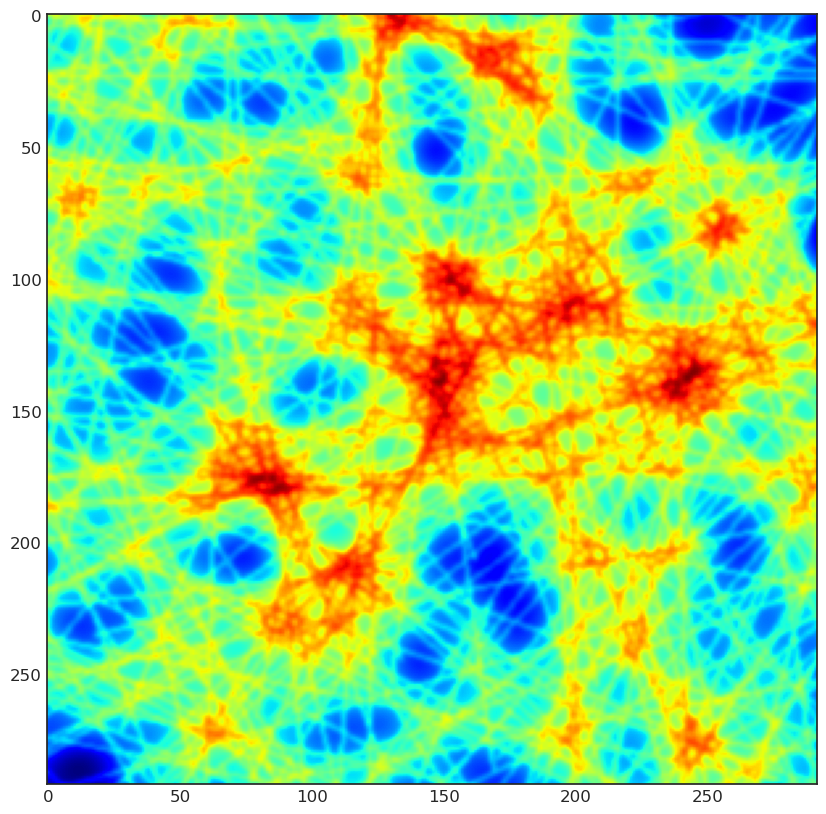

In [27]:
plt.imshow(trim(YY_ground_truth), cmap = 'jet')

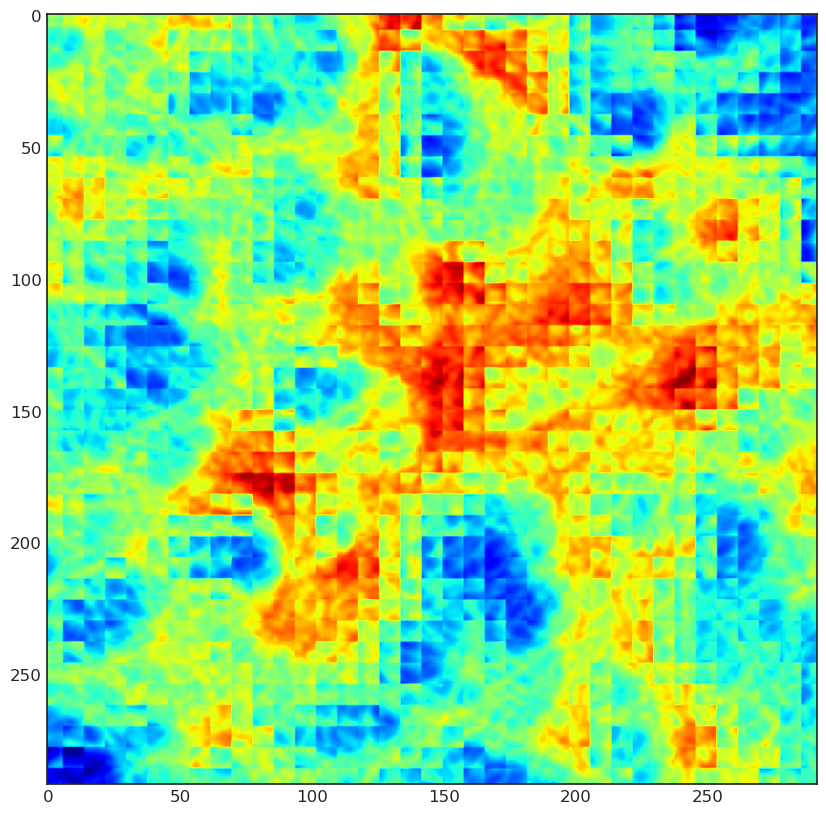

In [28]:
plt.imshow(trim(reassemble(b)[0]), cmap = 'jet')

## PtychoNN (vanilla)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 32)   0           ['conv2d_1[0][0]']               
                                                                                              

Epoch 8/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0057 - conv2d_12_loss: 0.0056 - conv2d_19_loss: 2.6324e-05 - val_loss: 0.0056 - val_conv2d_12_loss: 0.0055 - val_conv2d_19_loss: 1.9587e-05 - lr: 5.0000e-04
Epoch 9/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0056 - conv2d_12_loss: 0.0056 - conv2d_19_loss: 2.6292e-05 - val_loss: 0.0056 - val_conv2d_12_loss: 0.0055 - val_conv2d_19_loss: 2.9816e-05 - lr: 5.0000e-04
Epoch 10/60
366/366 [==============================] - ETA: 0s - loss: 0.0056 - conv2d_12_loss: 0.0056 - conv2d_19_loss: 2.6281e-05
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
366/366 [==============================] - 4s 11ms/step - loss: 0.0056 - conv2d_12_loss: 0.0056 - conv2d_19_loss: 2.6281e-05 - val_loss: 0.0055 - val_conv2d_12_loss: 0.0055 - val_conv2d_19_loss: 2.0626e-05 - lr: 5.0000e-04
Epoch 11/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0055 - conv2d_12_loss:

366/366 [==============================] - 4s 11ms/step - loss: 0.0049 - conv2d_12_loss: 0.0049 - conv2d_19_loss: 5.2477e-06 - val_loss: 0.0056 - val_conv2d_12_loss: 0.0056 - val_conv2d_19_loss: 6.1468e-06 - lr: 1.0000e-04
Epoch 41/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0048 - conv2d_12_loss: 0.0048 - conv2d_19_loss: 5.2493e-06 - val_loss: 0.0055 - val_conv2d_12_loss: 0.0055 - val_conv2d_19_loss: 3.7986e-06 - lr: 1.0000e-04
Epoch 42/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0047 - conv2d_12_loss: 0.0047 - conv2d_19_loss: 5.2477e-06 - val_loss: 0.0057 - val_conv2d_12_loss: 0.0057 - val_conv2d_19_loss: 6.1458e-06 - lr: 1.0000e-04
Epoch 43/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0046 - conv2d_12_loss: 0.0046 - conv2d_19_loss: 5.2493e-06 - val_loss: 0.0056 - val_conv2d_12_loss: 0.0056 - val_conv2d_19_loss: 3.7996e-06 - lr: 1.0000e-04
Epoch 44/60
366/366 [==============================] - 4s 11ms/step - lo

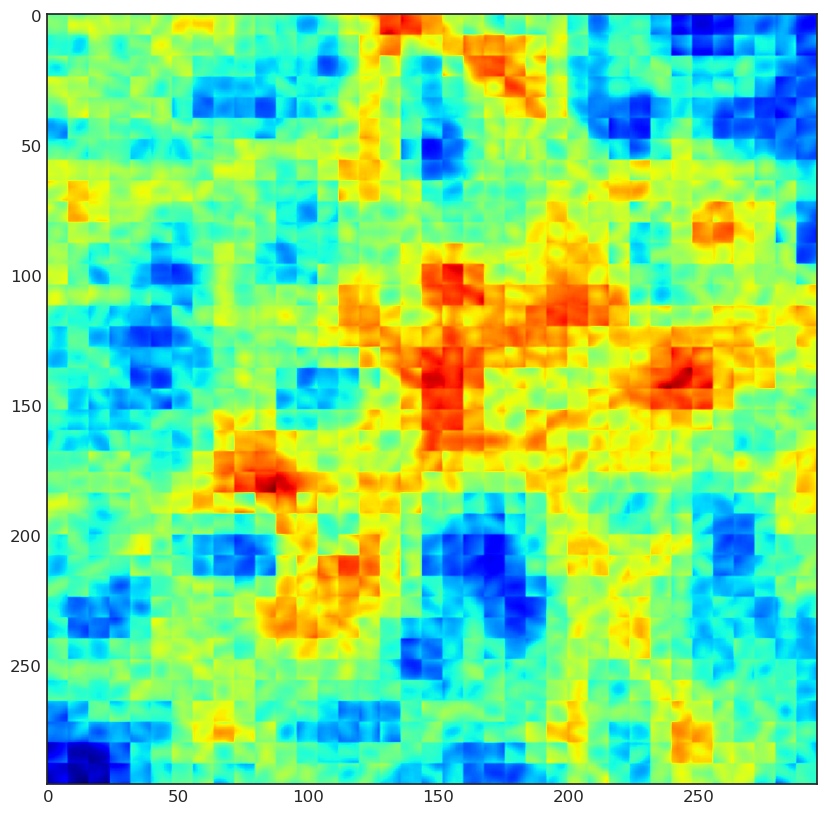

In [29]:
from ptycho import params as p
p.cfg['gridsize'] = 1
p.cfg['n_filters_scale'] = 1

from ptycho.generate_data import *

from ptycho import baselines as bl

reload(bl)

baseline_model = bl.train((X_train[:, :, :, :1]), Y_I_train[:, :, :, :1], Y_phi_train[:, :, :, :1])

plt.rcParams["figure.figsize"] = (10, 10)

baseline_pred_I, baseline_pred_phi = baseline_model.predict([X_test[:, :, :, 0] * bl.params.params()['intensity_scale']])
baseline_stitched = stitch(baseline_pred_I, norm_Y_I_test, nsegments=37)

plt.imshow(baseline_stitched[0], cmap = 'jet')#, vmin = vmin, vmax = vmax)

In [30]:
i = 0
YY_ground_truth = YY_I_test_full[i, clipleft: -clipright, clipleft: -clipright]

ptychoNN_mae = mae(trim(YY_ground_truth), trim(baseline_stitched[i]))
ptychoNN_mae

mean scale adjustment: 0.22436713421165283


0.040613990464373875

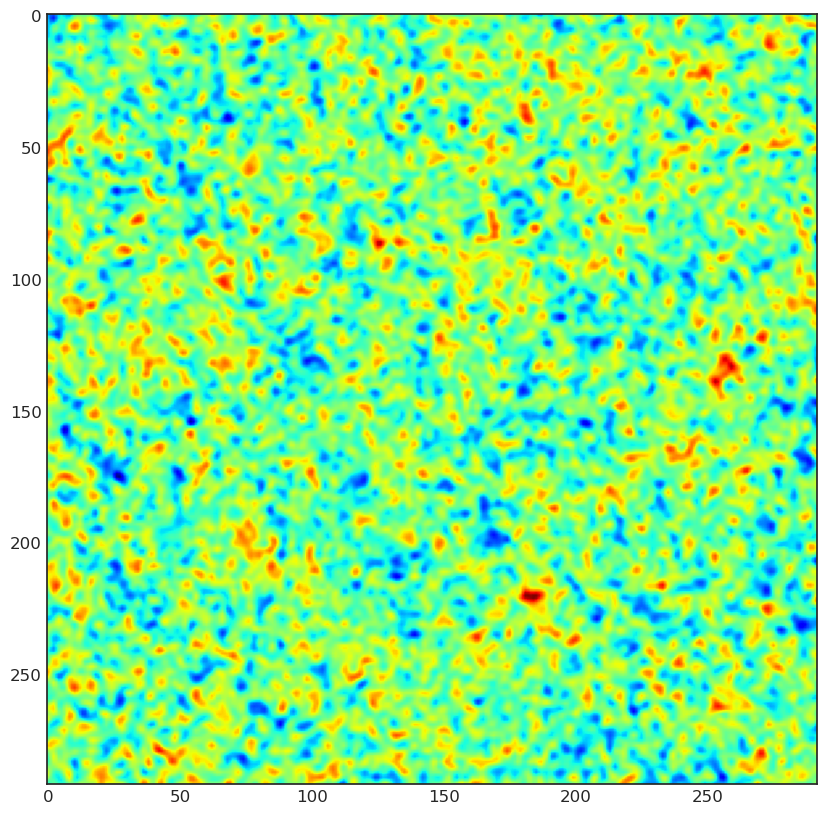

In [44]:
plt.imshow(trim(YY_ground_truth), cmap = 'jet')

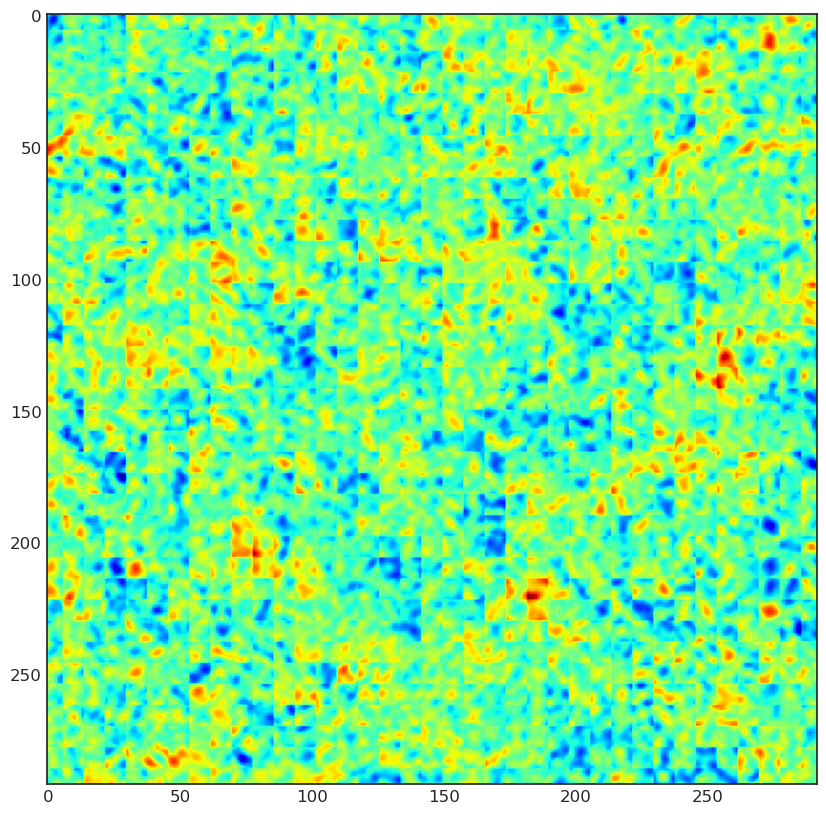

In [45]:
plt.imshow(trim(reassemble(b)[0]), cmap = 'jet')

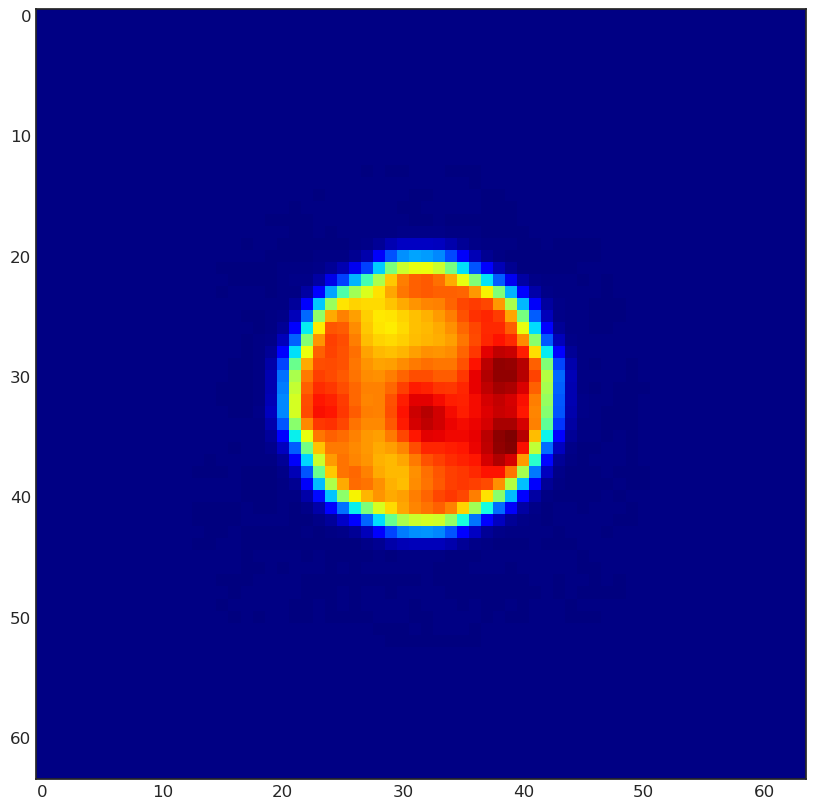

In [53]:
plt.imshow(baseline_pred_I[40], cmap = 'jet')

In [ ]:
# YY_baseline = xyshift(baseline_stitched[0], -2, -2)


In [48]:
def normed_ff_np(arr):
    return (f.fftshift(np.absolute(f.fft2(np.array(arr)))) / np.sqrt(h * w))

In [49]:
from ptycho import fourier as f
from ptycho import tf_helper as hh

/tmp/ipykernel_216449/3066293683.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(tmp),
/tmp/ipykernel_216449/3066293683.py:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')


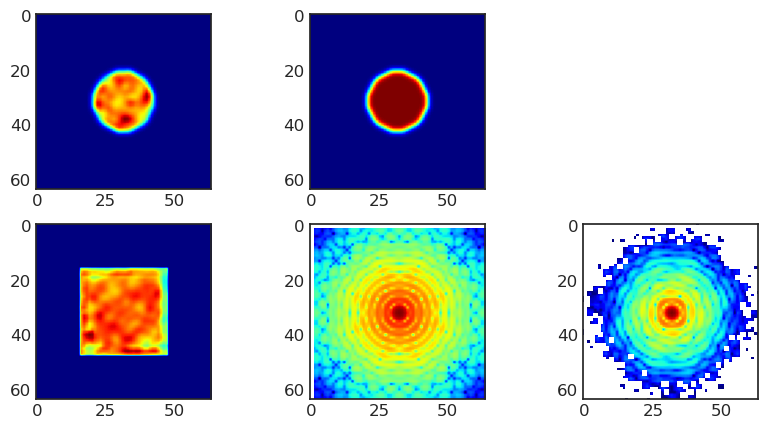

In [50]:
plt.rcParams["figure.figsize"] = (10, 5)


plt.subplot(2, 3, 1)

plt.imshow(Y_I_train[0, :, :, 0], cmap = 'jet')

plt.subplot(2, 3, 2)
plt.imshow(np.absolute(model.autoencoder.variables[-1]), cmap = 'jet')
# plt.colorbar()


plt.subplot(2, 3, 4)
plt.imshow(np.absolute(b[100, :, :, 0]), cmap = 'jet')

plt.subplot(2, 3, 5)
tmp = np.absolute(f.fftshift(f.fft2(np.array(model.autoencoder.variables[-1][:, :, 0]))))
plt.imshow(np.log(tmp),
          cmap  ='jet')

plt.subplot(2, 3, 6)
plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')

# for i, v in enumerate(model.autoencoder.variables):
#     print(i, v.shape)

In [52]:
from ptycho import baselines as bl
# from ptycho.params import params

In [51]:
YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright].shape, stitched.shape

(TensorShape([296, 296, 1]), (3, 296, 296, 1))

In [55]:
ntake = 1000
nll_pinn = model.fn_poisson_nll(
    X_test[:ntake, :, :, :] * params.params()['intensity_scale'],
    a[:ntake, :, :, :] * params.params()['intensity_scale'])

In [273]:
plt.rcParams["figure.figsize"] = (5, 5)

(0.070346646, 0.14565049)

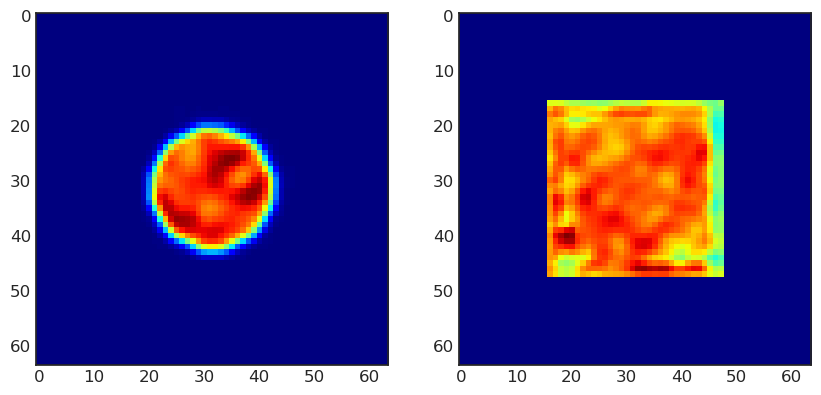

In [53]:
# plt.subplots(1, 2, 2)
plt.subplot(1, 2, 1)
plt.imshow(baseline_pred_I[100, :, :, 0], cmap = 'jet')
plt.subplot(1, 2, 2)
plt.imshow(np.absolute(b[100, :, :, 0]), cmap = 'jet')
baseline_pred_I[100, :, :, 0].mean(), np.mean(np.absolute(b[100, :, :, 0]))

In [183]:
from ptycho import physics
baseline_pred_diff_amplitude = hh.pad_and_diffract(baseline_pred_I, 64, 64, False)[0]

## Evaluation (NLL and MAE)

In [165]:
nll_baseline = model.fn_poisson_nll(
    X_test[:ntake, :, :, :1] * params()['intensity_scale'],
    baseline_pred_diff_amplitude[:ntake, :, :, :] * params()['intensity_scale'])

In [172]:
bopi_flat = hh._channel_to_flat(baseline_overlap_pred_I)
baseline_overlap_pred_diff_amplitude = hh._flat_to_channel(hh.pad_and_diffract(bopi_flat, 64, 64, False)[0])

In [ ]:
nll_baseline_overlap = model.fn_poisson_nll(
    X_test[:ntake, :, :, :] * params()['intensity_scale'],
    baseline_overlap_pred_diff_amplitude[:ntake, :, :, :] * params()['intensity_scale'])

In [206]:
np.mean(nll_baseline_overlap) / (4 * 64 * 64)

588144.6875

In [208]:
np.mean(nll_baseline) / (64 * 64)

587291.25

In [210]:
np.mean(nll_pinn) / (4 * 64 * 64)

92.91577911376953

In [10]:
Itest = (X_test * p.get('intensity_scale'))**2

In [12]:
Itest.shape

TensorShape([4107, 64, 64, 1])

In [17]:
np.max(Itest, axis = 1).max(axis = 1).mean()

100118650.0

/tmp/ipykernel_1142737/2294212082.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')


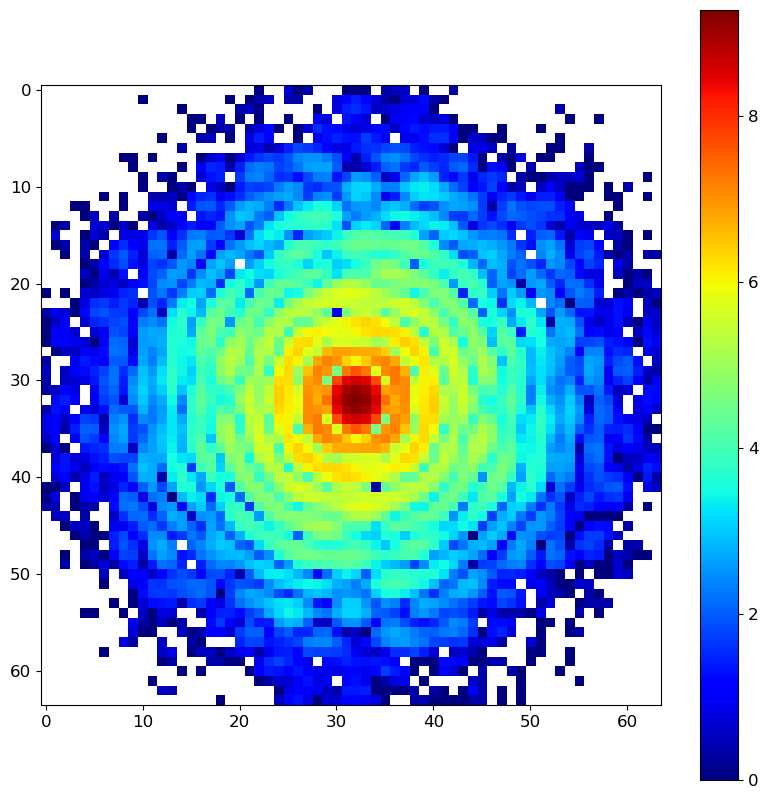

In [22]:
plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')
plt.colorbar()

In [57]:
%timeit -n 1 -r 1 baseline_model.predict([X_test[:, :, :, :1]  * model.params()['intensity_scale']])

129/129 [==============================] - 1s 3ms/step
684 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [55]:
%timeit -n 1 -r 1 baseline_model_overlap.predict([X_test[:, :, :, :4]  * model.params()['intensity_scale']])

129/129 [==============================] - 1s 4ms/step
963 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [221]:
# should be close
stitched.mean(), baseline_stitched[0].mean(), baseline_overlap_stitched[0].mean()

(2.8294327, 2.8508396, 2.8469071)

In [42]:
i = 0
# consistency check: should be close to equal
np.sum(tf.math.abs(a[i])**2), np.sum(tf.math.abs(X_test[i])**2),\
np.sum(tf.math.abs(a)**2), np.sum(tf.math.abs(X_test)**2)

(684.1687, 749.7991, 2316089.5, 2534097.2)

## Relative error of diffraction amplitude:

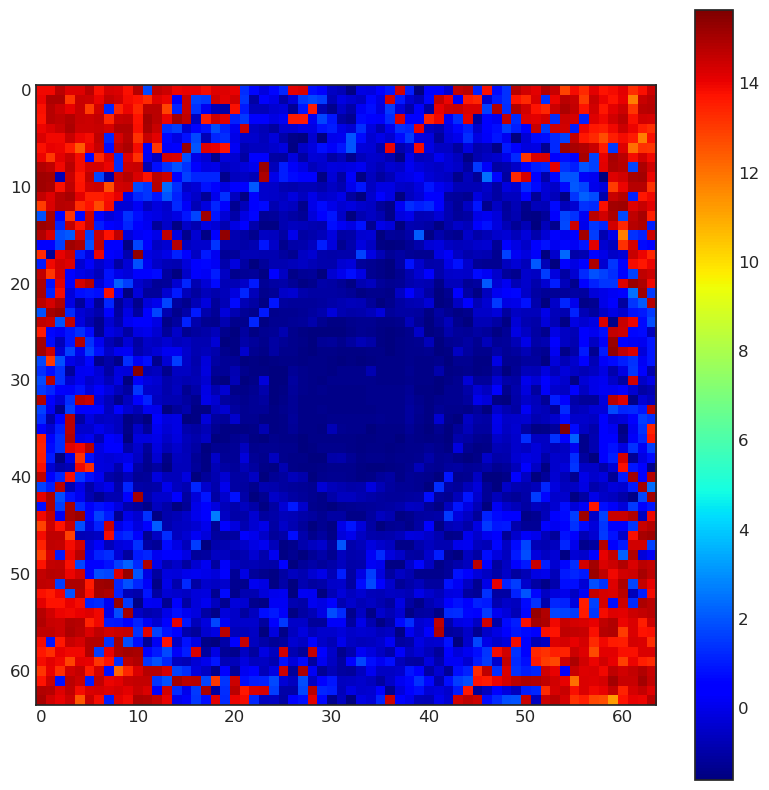

In [43]:
plt.imshow(np.log(.2 + np.abs((a[i, :, :, 0] - X_test[i, :, :, 0]) / (X_test[i, :, :, 0] + 1e-9))), cmap ='jet')
plt.colorbar()

In [45]:
# !ln ../xrd_clustering/notebooks/visualization.py
from ptycho import visualization as vis
reload(vis)

<module 'ptycho.visualization' from '/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/visualization.py'>

diffraction reconstruction


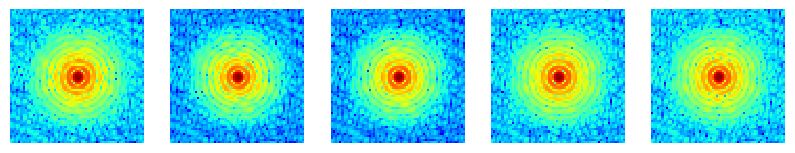

diffraction ground truth


/tmp/ipykernel_2102395/1178352548.py:10: RuntimeWarning: divide by zero encountered in log
  vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])


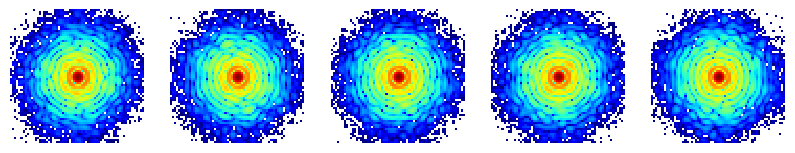

object reconstruction (amp)


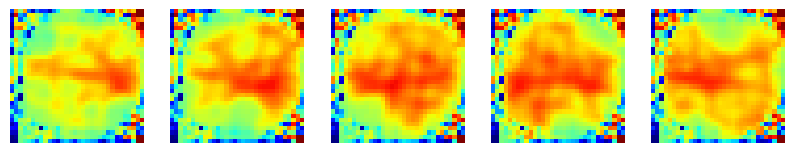

object ground truth


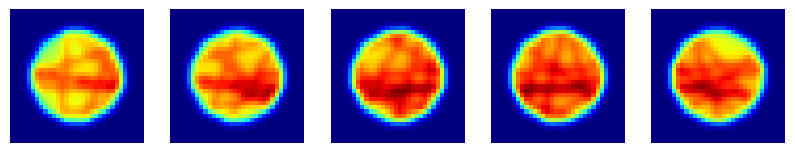

In [46]:
off = 5

vmin = np.min(Y_I_test[:, 16:-16, 16:-16][i:i + off])
vmax = np.max(Y_I_test[:, 16:-16, 16:-16][i:i + off])

print('diffraction reconstruction')
vis.display_imgs(np.log(np.absolute(a[:, :, :, 0]))[i:i + off])

print('diffraction ground truth')
vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])

print('object reconstruction (amp)')
vis.display_imgs(np.absolute(b[:, 16:-16, 16:-16, 0])[i:i + off], vmin = vmin, vmax = vmax)
# print('object reconstruction (phase)')
# vis.display_imgs(np.angle(b[:, 16:-16, 16:-16, 0])[i:i + 10])#, vmin = vmin, vmax = vmax)
print('object ground truth')
vis.display_imgs(Y_I_test[:, 16:-16, 16:-16, 0][i:i + off], vmin = vmin, vmax = vmax)

In [47]:
# Evaluate resolution

# np.random.seed(2)
# Y_I_2, Y_phi_2, _Y_I_full_2, _ = datasets.simulate_objects(3, size)

# line = np.zeros_like(Y_I_2)
# line[:, 31, :, :] = .1
# line = f.gf(line, (0, 1, 1, 0))


# X_2, Y_I_2, Y_phi_2, _ =\
#     physics.illuminate_and_diffract(Y_I_2 + line, Y_phi_2, probe, intensity_scale = intensity_scale)

# plt.imshow((Y_I_2 - Y_I_test)[0, :, :, 0])
# plt.colorbar()

# b2 = model.diffraction_to_obj([X_2])
# difference = np.real(b2 - model.diffraction_to_obj([X_test])).mean(axis = 0)

# plt.imshow(difference, cmap = 'jet')

# lineout_orig = line[0, :, :, 0].sum(axis = 1)
# lineout_recon = difference[:, :, 0].sum(axis = 1)

## save model

In [48]:
history.history.keys()

dict_keys(['loss', 'trimmed_obj_loss', 'pred_diff_channels_loss', 'distribution_lambda_loss', 'trimmed_obj_1_loss', 'val_loss', 'val_trimmed_obj_loss', 'val_pred_diff_channels_loss', 'val_distribution_lambda_loss', 'val_trimmed_obj_1_loss', 'lr'])

In [50]:
# np.save(path+'str_history2', history.history)

In [251]:
# model.load_weights(checkpoint_filepath)

In [68]:
# autoencoder.save('{}.h5'.format(wt_path))